In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import warnings
warnings.filterwarnings('ignore')

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
tcs = pd.read_csv("D:\\BE practicals\\ML\\TCS_stock_history.csv")

In [5]:
tcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [6]:
tcs.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [7]:
tcs.shape

(4463, 8)

In [8]:
train_data = tcs.iloc[:,4:5].values

In [9]:
train_data

array([[  29.51914024],
       [  29.11947632],
       [  27.11187744],
       ...,
       [3779.14990234],
       [3791.89990234],
       [3773.19995117]])

In [10]:
sc = MinMaxScaler(feature_range=(0,1))
train_data = sc.fit_transform(train_data)
train_data.shape

(4463, 1)

In [11]:
# preparing data for training

x_train = []
y_train = []

# 5 --> timestep and 4463 --> length of data
for i in range(5, 4463):
    x_train.append(train_data[i-5:i,0])
    y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) # adding the batch_size axis
x_train.shape

(4458, 5, 1)

In [13]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# training our model
hist = model.fit(x_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
4458/4458 - 33s - loss: 3.2874e-04 - 33s/epoch - 7ms/step
Epoch 2/50
4458/4458 - 31s - loss: 3.1491e-04 - 31s/epoch - 7ms/step
Epoch 3/50
4458/4458 - 31s - loss: 3.1719e-04 - 31s/epoch - 7ms/step
Epoch 4/50
4458/4458 - 31s - loss: 3.1690e-04 - 31s/epoch - 7ms/step
Epoch 5/50
4458/4458 - 31s - loss: 3.2724e-04 - 31s/epoch - 7ms/step
Epoch 6/50
4458/4458 - 31s - loss: 3.2371e-04 - 31s/epoch - 7ms/step
Epoch 7/50
4458/4458 - 31s - loss: 3.0882e-04 - 31s/epoch - 7ms/step
Epoch 8/50
4458/4458 - 31s - loss: 3.3664e-04 - 31s/epoch - 7ms/step
Epoch 9/50
4458/4458 - 33s - loss: 3.2107e-04 - 33s/epoch - 7ms/step
Epoch 10/50
4458/4458 - 35s - loss: 3.0606e-04 - 35s/epoch - 8ms/step
Epoch 11/50
4458/4458 - 36s - loss: 3.1601e-04 - 36s/epoch - 8ms/step
Epoch 12/50
4458/4458 - 33s - loss: 3.2907e-04 - 33s/epoch - 7ms/step
Epoch 13/50
4458/4458 - 143s - loss: 3.0798e-04 - 143s/epoch - 32ms/step
Epoch 14/50
4458/4458 - 29s - loss: 2.9170e-04 - 29s/epoch - 6ms/step
Epoch 15/50
4458/4458 - 29

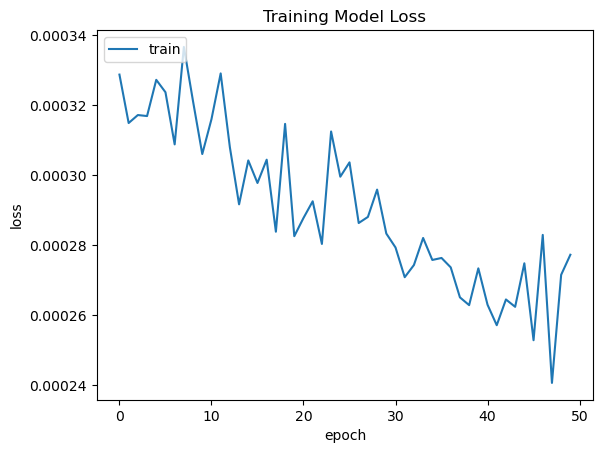

In [17]:
# visualizing the loss at each epoch
plt.plot(hist.history["loss"])
plt.title("Training Model Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train"], loc="upper left")
plt.show()

In [28]:
# testing out model, using the test dataset

testdata = pd.read_csv("D:\\BE practicals\\ML\\TCS_stock_history.csv")
# print(testdata)
testdata["Close"] = pd.to_numeric(testdata.Close, errors="coerce")
# print(testdata.info())
testdata = testdata.dropna()
testdata= testdata.iloc[:,4:5]
# print(testdata)
# print(testdata.shape)
y_test = testdata.iloc[ 5: , 0:].values
# y_test = testdata.iloc[ : , : ].values
print(y_test)

# # input array for the model
inputclosing = testdata.iloc[:,0:].values
# print(inputclosing)
inputclosing_scaled =  sc.transform(inputclosing)
# print(inputclosing_scaled)
print(inputclosing_scaled.shape)

x_test = []
length = len(testdata)
timestep = 5

for i in range(5, 20):
    x_test.append(inputclosing_scaled[i-5:i,0])
# print(x_test)

x_test = np.array(x_test)
# print(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

[[  26.37760925]
 [  27.11187744]
 [  28.44096375]
 ...
 [3779.14990234]
 [3791.89990234]
 [3773.19995117]]
(4463, 1)


(15, 5, 1)

In [29]:
y_pred = model.predict(x_test)
# print(y_pred)

1/1 [==============================] - 0s 27ms/step


In [30]:
# to plot actual and predicted

predicted_price = sc.inverse_transform(y_pred)

print(predicted_price)

[[77.912056]
 [78.68986 ]
 [79.5204  ]
 [79.570564]
 [79.67125 ]
 [79.700165]
 [79.117744]
 [77.98534 ]
 [76.609665]
 [75.477615]
 [75.85211 ]
 [76.41545 ]
 [76.149994]
 [75.256355]
 [73.73973 ]]


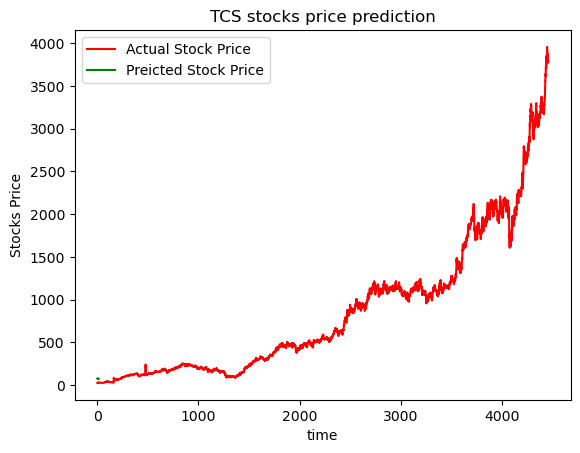

In [31]:
#ploting

plt.plot(y_test, color="red")
plt.plot(predicted_price, color="GREEN")
plt.title("TCS stocks price prediction")
plt.xlabel("time")
plt.ylabel("Stocks Price")
plt.legend(["Actual Stock Price", "Preicted Stock Price"])
plt.show()
